# **FINAL PROJECT 3** - Ensemble

Kelompok 8 - PYTN 012
- DWI PUJINING TYAS
- NUR ANISAH
- FATIMAH ZAHRA

## Perkenalan

Penyakit kardiovaskular atau cardiovascular disease (CVDs) adalah penyakit yang berkaitan dengan jantung dan pembuluh darah. Penyakit ini menjadi penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta nyawa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD. 

Kumpulan data ini berisi 12 fitur yang digunakan untuk memprediksi kematian akibat gagal jantung.

## Import Libraries

In [1]:
# Library For DataFrame
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# For Data Exploration
import sklearn
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets

#For Transform Data
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from numpy import exp

# For Evaluation
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, auc, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

# For Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


## Data Loading

In [2]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.shape

(299, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
df['age'] = df['age'].astype(int)

In [ ]:
df.dtypes

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Data Cleaning

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

## EDA & Visualization

In [4]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

(-1.1198839000517573,
 1.1452675353838286,
 -1.112524974860086,
 1.128514679178454)

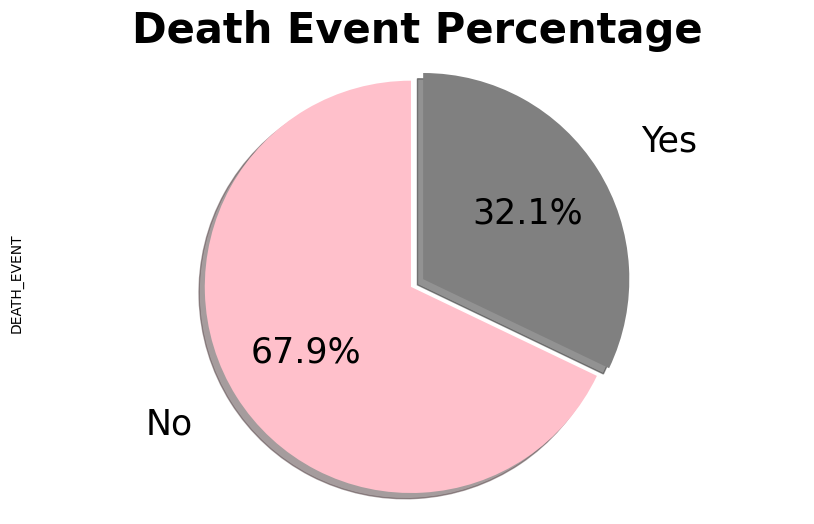

In [ ]:
lable=['No', 'Yes']
color_list = ["pink", "grey"]
explode_list = [0.02, 0.05]

ax = plt.axes()
ax.set_facecolor("black")

df['DEATH_EVENT'].value_counts().plot(
    kind='pie'
    ,figsize=(10,6)
    ,autopct='%1.1f%%'
    ,startangle=90
    ,shadow=True
    ,labels=lable
    ,labeldistance = 1.25
    ,explode=explode_list
    ,colors=color_list
    ,textprops={'fontsize': 25,'color':'black'}
)

plt.title('Death Event Percentage', fontsize=30, weight='bold')
plt.axis('equal')


Berdasarkan visualisasi data diatas menunjukkan bahwa kematian terbesar bukan berasal dari penyakit gagal jantung dengan persentase sebesar 67.9%  

In [ ]:
death_age = pd.DataFrame(df[(df['DEATH_EVENT']==1)].groupby('age').count()['DEATH_EVENT'])
                           
death_age

,DEATH_EVENT
age,
42,1
45,6
46,1
48,2
49,1
50,8
51,1
53,1
54,1


Text(0.5, 0, 'Age')

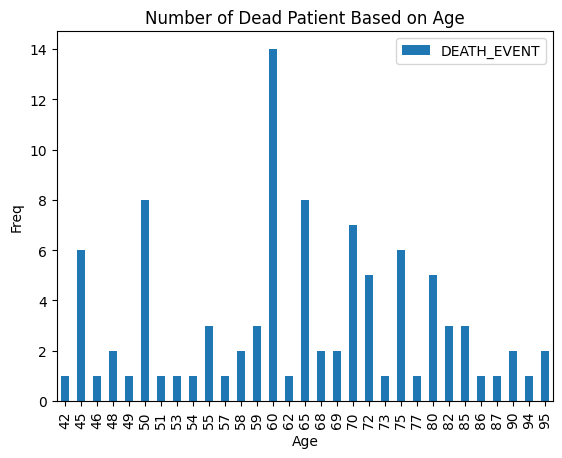

In [ ]:
ax = death_age.plot(
    kind='bar')

ax.set_title("Number of Dead Patient Based on Age")
ax.set_ylabel('Freq')
ax.set_xlabel('Age')

In [ ]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [ ]:
db = pd.crosstab(df['DEATH_EVENT'],df['diabetes'])
db

diabetes,0,1
DEATH_EVENT,,
0,118,85
1,56,40


In [ ]:
death_diabet= db/(db.sum().values)*100
death_diabet

diabetes,0,1
DEATH_EVENT,,
0,67.816092,68.0
1,32.183908,32.0


In [ ]:
df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
death_pr = pd.DataFrame(df[(df['DEATH_EVENT']==1)].groupby('anaemia').count()['DEATH_EVENT'])
                           
death_pr

,DEATH_EVENT
anaemia,
0,50
1,46


In [ ]:
sc = df.groupby(["DEATH_EVENT"]).serum_creatinine.agg(["mean"])
sc

,mean
DEATH_EVENT,
0,1.184877
1,1.835833


In [ ]:
ss = df.groupby(["DEATH_EVENT"]).serum_sodium.agg(["mean"])
ss

,mean
DEATH_EVENT,
0,137.216749
1,135.375000


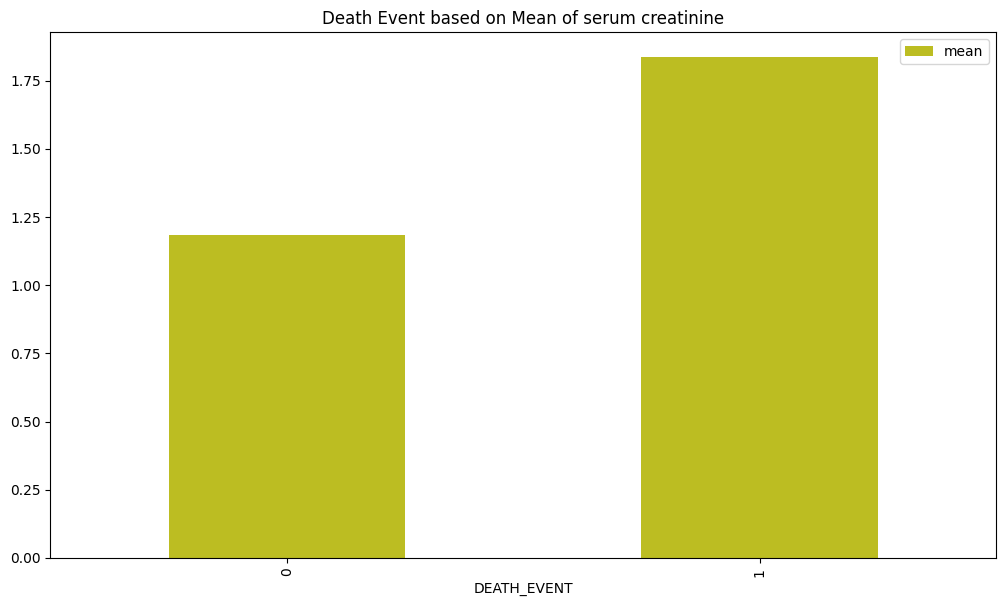

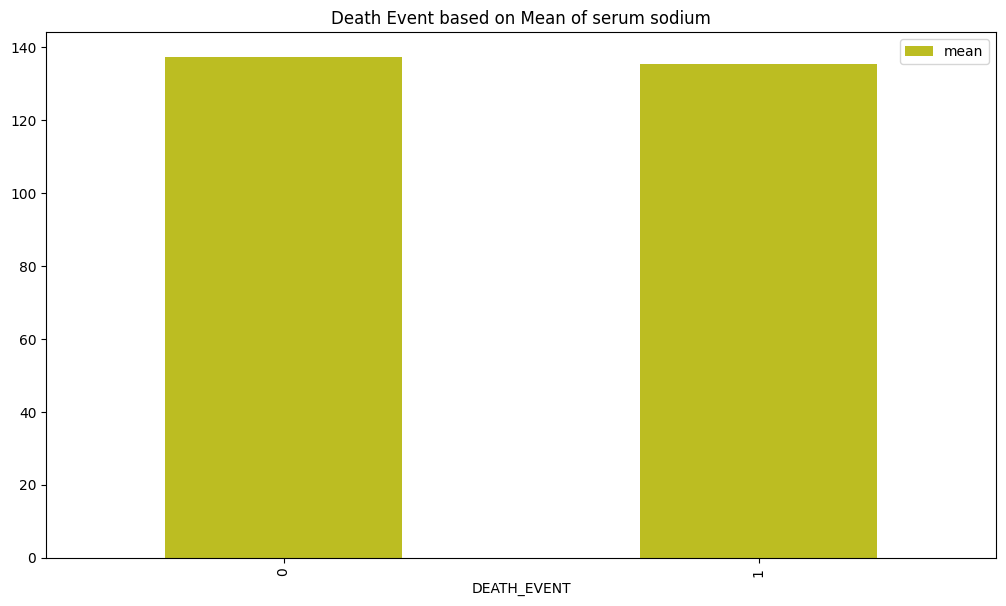

In [ ]:
labels = ['Alive', 'Dead']
colors=['tab:olive', 'tab:red']

sc.plot(kind='bar', title = 'Death Event based on Mean of serum creatinine', figsize=(10,6), color=colors, label=labels )
plt.tight_layout(pad=0.5)

ss.plot(kind='bar', title = 'Death Event based on Mean of serum sodium', figsize=(10,6), color=colors, label=labels)
plt.tight_layout(pad=0.5)

plt.show()


## Correlation

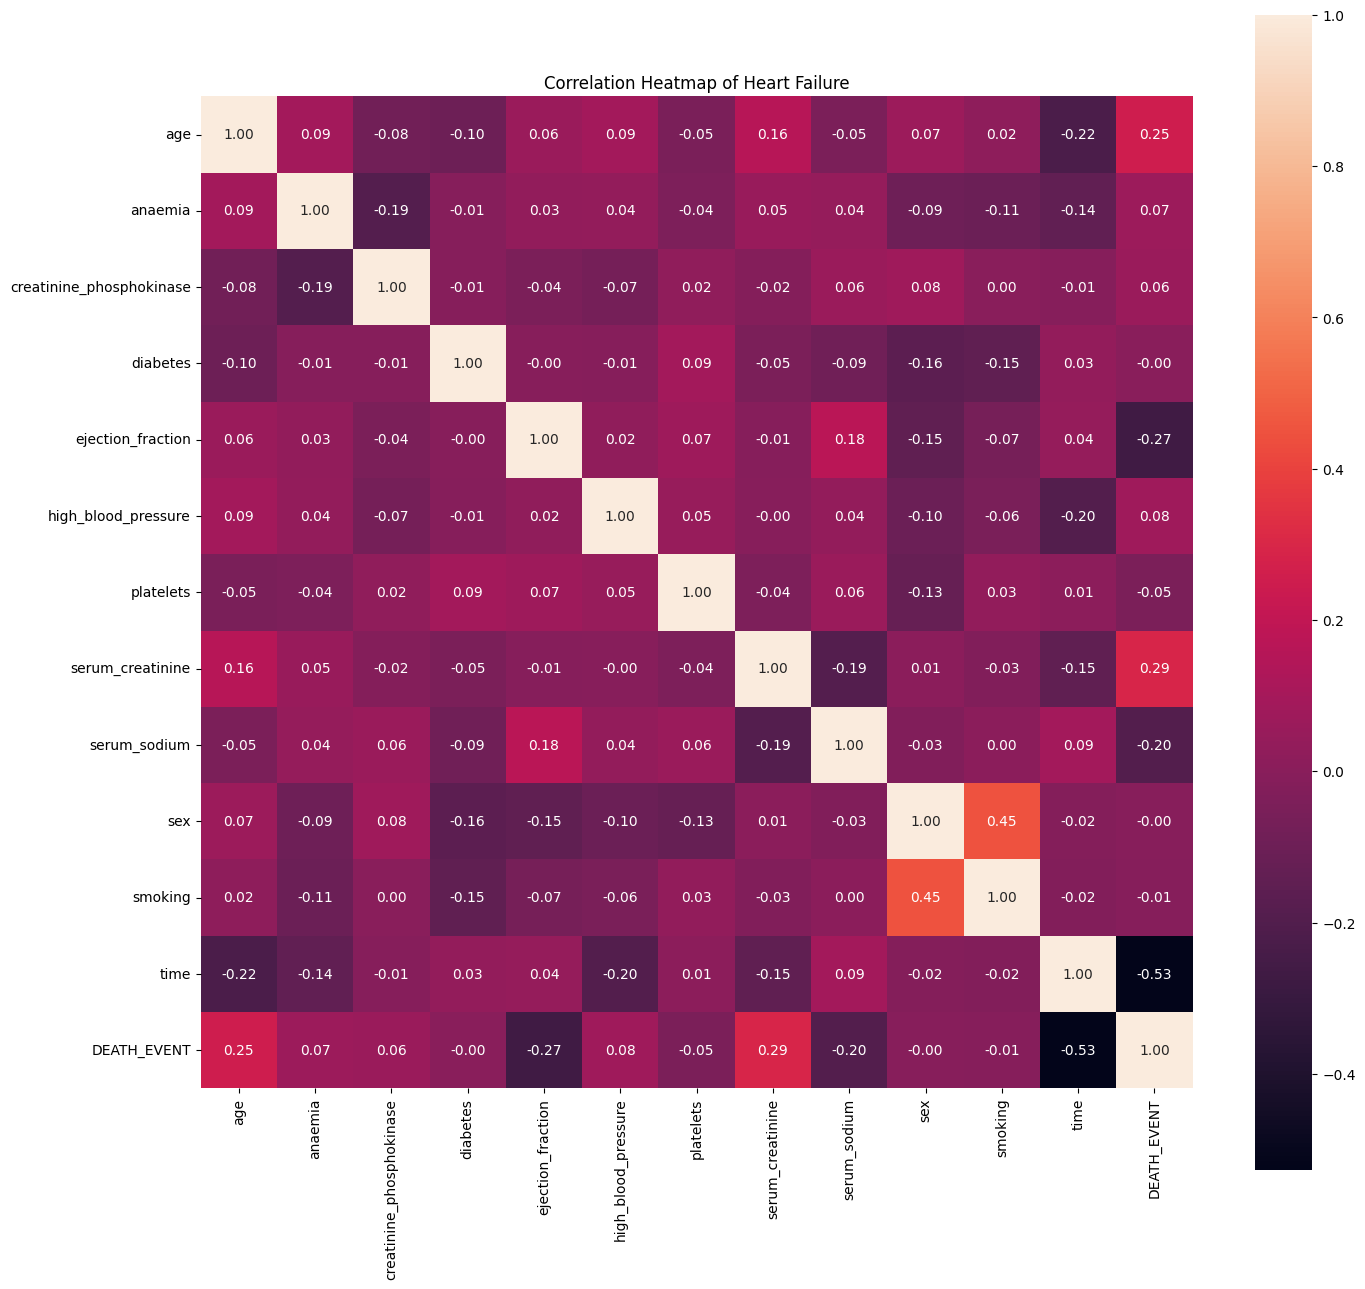

In [ ]:
plt.figure(figsize=(16,15))
plt.title('Correlation Heatmap of Heart Failure')
ax = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels())           
plt.show()

In [ ]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.087574,-0.081406,-0.101454,0.060195,0.093170,-0.052475,0.159237,-0.045912,0.065546,0.018926,-0.224265,0.253581
anaemia,0.087574,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081406,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101454,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060195,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093170,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052475,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159237,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045912,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065546,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


## Data Prepocessing

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Replace category column with encode label

In [5]:
le = LabelEncoder()
df.anaemia = le.fit_transform(df.anaemia)
df.diabetes = le.fit_transform(df.diabetes)
df.high_blood_pressure = le.fit_transform(df.high_blood_pressure)
df.sex = le.fit_transform(df.sex)
df.smoking = le.fit_transform(df.smoking)

In [6]:
df.DEATH_EVENT = le.fit_transform(df.DEATH_EVENT)

Melakukan encoding dengan Label Encoder pada atribut yang memiliki 2 kategori label:

In [7]:
def one_hot_encoder(df,feature,keep_first=True):
    one_hot_cols = pd.get_dummies(df[feature])
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_df = pd.concat([df,one_hot_cols],axis=1)
    new_df.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_df=new_df.iloc[:,1:]
    
    return new_df

df_copy = df.copy()
for col in df_copy.select_dtypes(include='O').columns:
    df_copy=one_hot_encoder(df_copy,col)

df_copy.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Feature Selection

In [8]:
x = df_copy.drop(['DEATH_EVENT'], axis=1)
y = df_copy['DEATH_EVENT']

print(x.shape)
print(y.shape)

(299, 12)
(299,)


In [9]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)
x_new = bestfeatures.fit_transform(x, y)
names = x.columns.values[bestfeatures.get_support()]
scores = bestfeatures.scores_[bestfeatures.get_support()]
names_scores = list(zip(names, scores))
df_column = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
df_column

,Feat_names,F_Scores
0,age,20.410478
1,anaemia,1.310096
2,creatinine_phosphokinase,1.173259
3,ejection_fraction,23.094063
4,high_blood_pressure,1.881937
5,platelets,0.718880
6,serum_creatinine,28.158492
7,serum_sodium,11.765331
8,smoking,0.047333
9,time,114.181264


In [10]:
X_fit = df[['age','anaemia', 'creatinine_phosphokinase','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium','smoking', 'time']]


### Data Splitting

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.2, random_state=0, stratify=y)

### Transforming Data for Modelling

In [12]:
pt = PowerTransformer(method='yeo-johnson')

X_train_transformed = pt.fit_transform(x_train)
X_test_transformed = pt.transform(x_test)

pd.DataFrame({'cols':x_train.columns , 'yeo-johnson': pt.lambdas_})


,cols,yeo-johnson
0,age,0.075820
1,anaemia,-1.059740
2,creatinine_phosphokinase,-0.198085
3,ejection_fraction,0.339284
4,high_blood_pressure,-2.383596
5,platelets,0.481515
6,serum_creatinine,-2.379726
7,serum_sodium,7.404560
8,smoking,-3.726167
9,time,0.638161


In [13]:
X_train_transformed = pd.DataFrame(X_train_transformed ,columns=x_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed ,columns=x_test.columns)

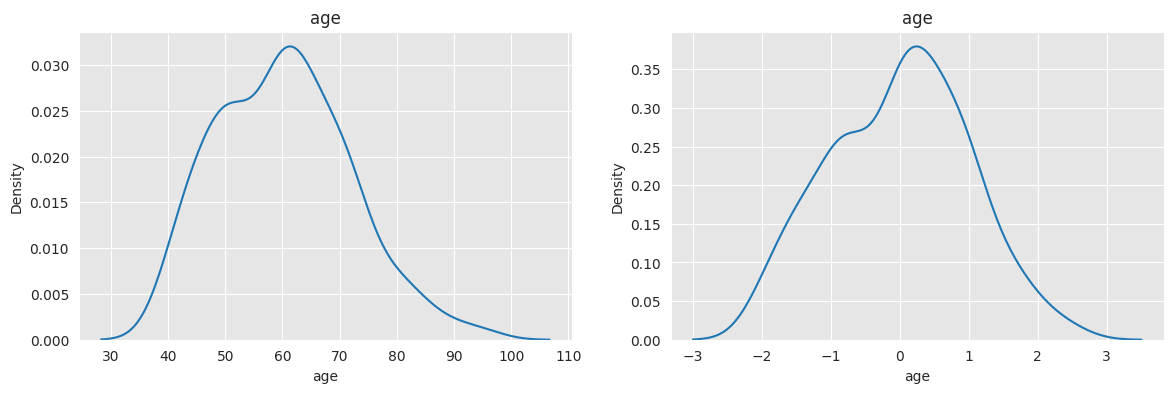

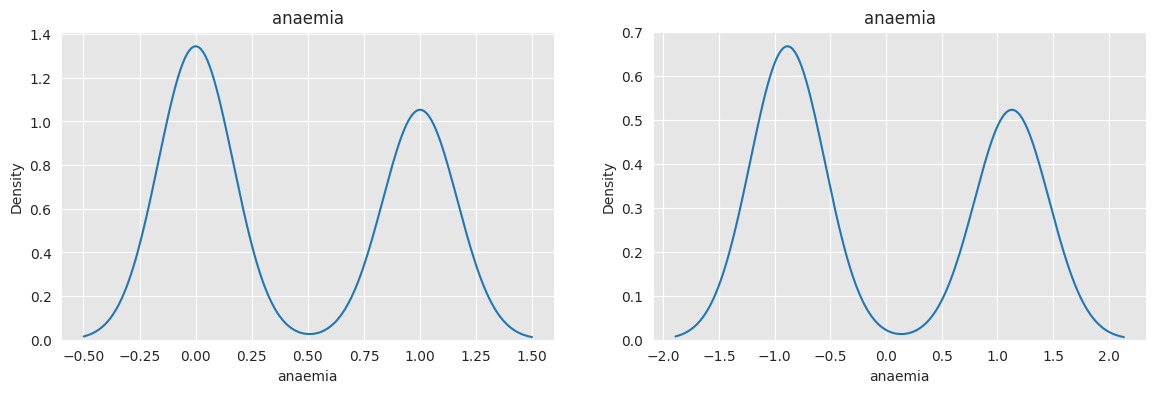

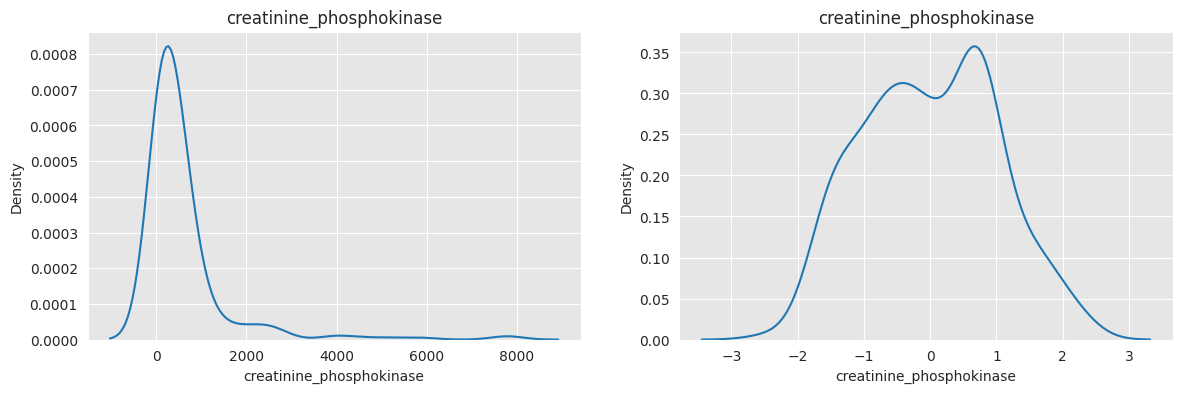

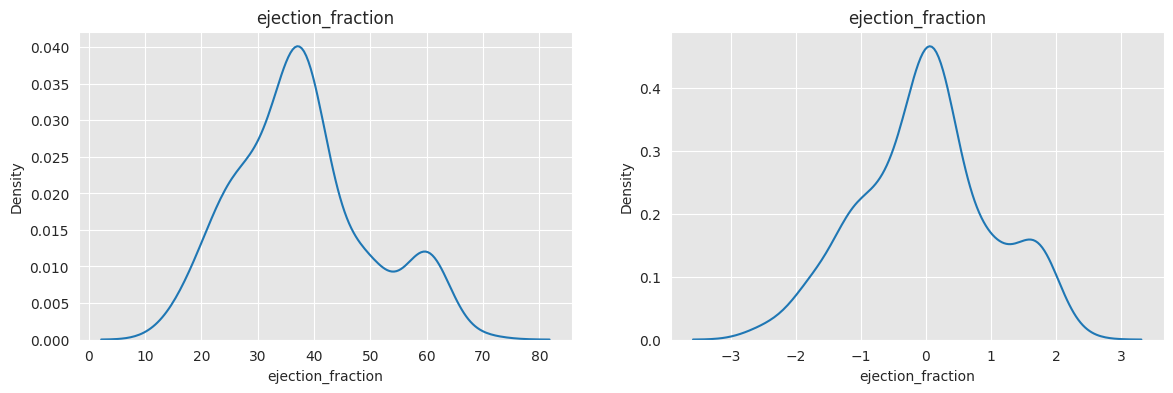

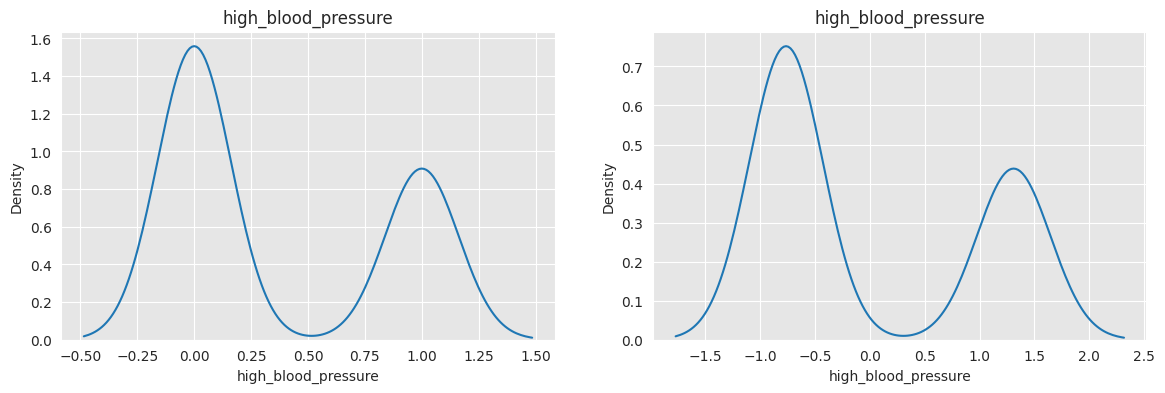

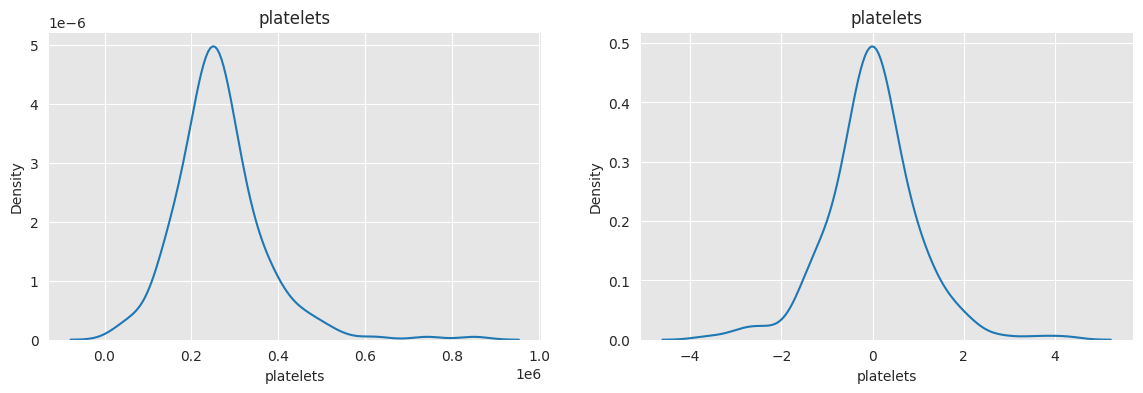

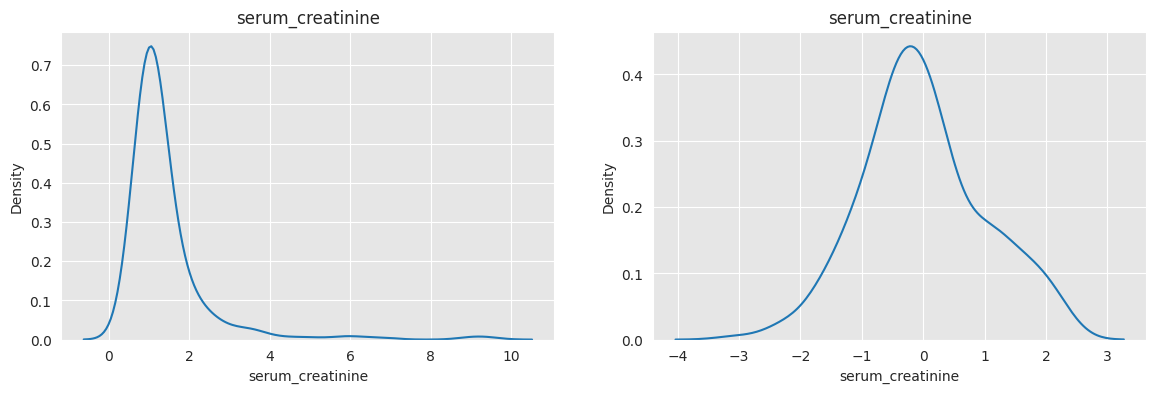

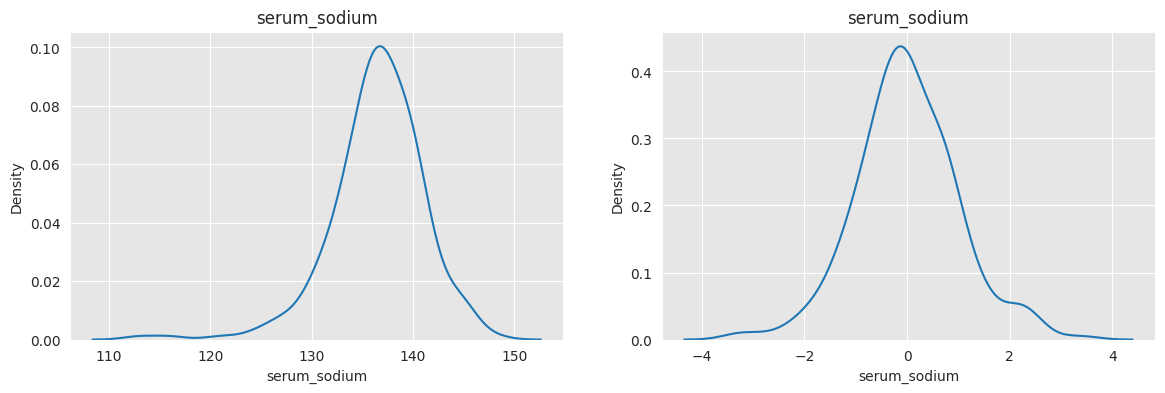

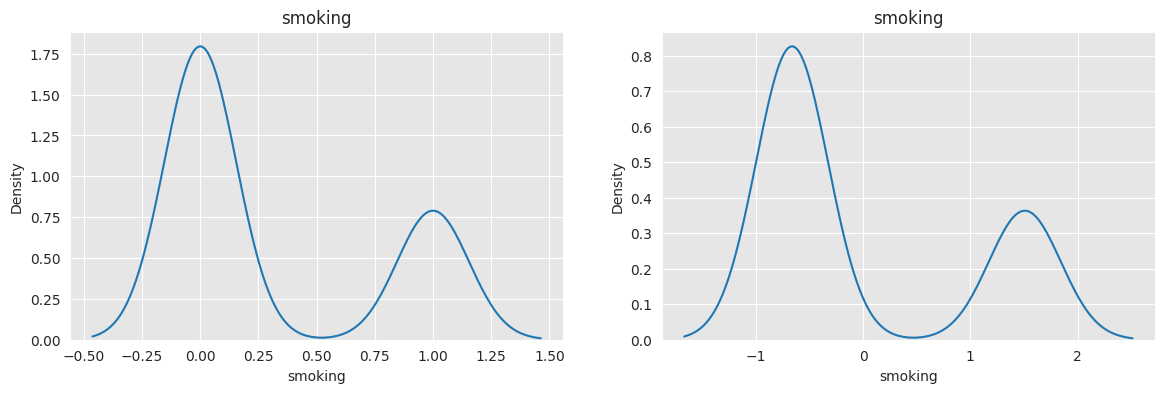

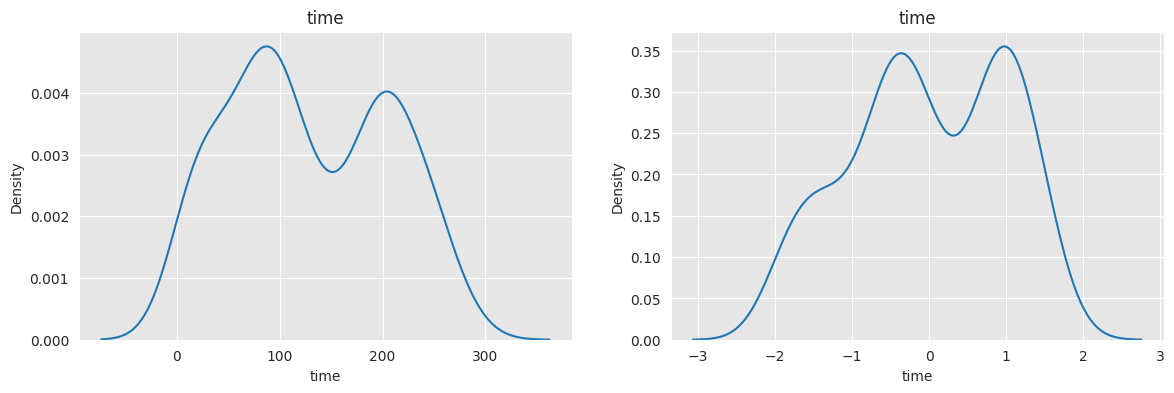

In [ ]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.kdeplot(X_train_transformed[col])
    plt.title(col)
    
    plt.show()

## Modeling

#### **1. Metrik Evaluasi** 
Untuk mengevaluasi sejauh mana model mampu mengklasifikasikan data secara keseluruhan dengan benar, metrik yang sesuai adalah akurasi (accuracy). 

Untuk memperhatikan kemampuan model dalam membedakan antara kelas yang berbeda, seperti dalam kasus ini antara "no" dan "yes", metrik yang baik adalah AUC-ROC (Area Under the ROC Curve). 

Menggabungkan penggunaan akurasi dan AUC-ROC dapat memberikan informasi yang lebih komprehensif tentang performa model. Akurasi memberikan informasi tentang keseluruhan kebenaran prediksi, sementara AUC-ROC memberikan informasi tentang kemampuan model dalam membedakan antara kelas yang berbeda.

Jadi, untuk mendapatkan perspektif yang lebih lengkap, menggunakan akurasi dan AUC-ROC adalah pilihan yang baik.

In [114]:
def plot_evaluation(y_true, y_pred, fpr, tpr, model_name, cmap='YlOrBr', color='red'):
    # Confusion Matrix
    CM = confusion_matrix(y_true, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(wspace=4.5)
    sns.heatmap(CM, annot=True, fmt=".0f", cmap=cmap, annot_kws={"fontsize": 12})
    plt.title("Confusion Matrix - {}\n(Accuracy Score: {:.3f})".format(model_name, accuracy_score(y_true, y_pred)), fontsize=17)
    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)

    # Plot ROC Curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color=color, lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/10.0 for i in range(11)])
    plt.xticks([i/10.0 for i in range(11)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}\n(ROC Score: {:.3f})'.format(model_name, auc(fpr, tpr)), fontsize=17)

    plt.tight_layout()
    plt.show()


### **2. Pemilihan Ensemble Model**
Ensemble model adalah pendekatan dalam machine learning yang menggabungkan beberapa model pembelajaran untuk meningkatkan kinerja prediksi. Ensemble model memanfaatkan prinsip bahwa gabungan dari beberapa model dapat menghasilkan prediksi yang lebih akurat dibandingkan dengan penggunaan model tunggal.

Ada 3 jenis ensemble model yang digunakan dalam prediksi kali ini, yaitu:
1. Bagging
2. Boosting
3. Stacking

## 1. Bagging Models


###  **1.1 Random Forest**
Model ini menggunakan sejumlah besar pohon keputusan yang dilatih secara independen pada subset acak dari data pelatihan. Pada model di bawah ini digunakan Random Forest sebanyak 50 pohon keputusan. Prediksi akhir didapatkan dengan menggabungkan hasil prediksi dari semua pohon. 

In [94]:
RF = RandomForestClassifier(n_estimators=50, random_state=10)
RF.fit(X_train_transformed, y_train)

RandomForestClassifier(n_estimators=50, random_state=10)

In [95]:
# Predict Model
y_pred_RF = RF.predict(X_test_transformed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_RF)
print("Accuracy Score :", accuracy)

fpr_RF, tpr_RF, thresholds = roc_curve(y_test, y_pred_RF)
print('ROC AUC Score: {}'.format(auc(fpr_RF, tpr_RF)))

Accuracy Score : 0.9166666666666666
ROC AUC Score: 0.8966623876765083


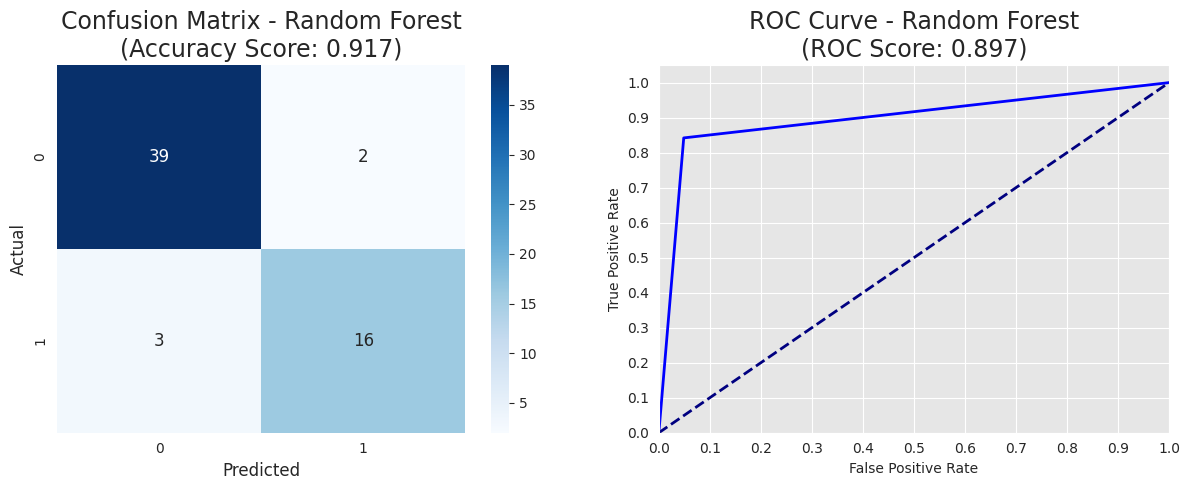

In [117]:
model_name = "Random Forest"
plot_evaluation(y_test, y_pred_RF, fpr_RF, tpr_RF, model_name, cmap='Blues', color='blue')

Berdasarkan hasil evaluasi model menggunakan Random Forest, diperoleh nilai akurasi sebesar 0.917 dan nilai ROC AUC sebesar 0.897. 

Dalam hal ini, model Random Forest menunjukkan performa yang sangat baik dengan akurasi yang tinggi dan ROC AUC yang cukup tinggi. Hal ini mengindikasikan bahwa model tersebut efektif dalam mengklasifikasikan data dengan akurasi yang tinggi dan memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif.

### **1.2 Bagging Classifier**
Ini adalah pendekatan umum yang menggunakan algoritma klasifikasi tertentu sebagai base estimator dan membangun banyak model dengan subset acak dari data pelatihan.

Keuntungan dari Bagging Classifier adalah dapat mengurangi varian dan overfitting, meningkatkan ketahanan terhadap data yang noisy, serta meningkatkan akurasi dan performa model secara keseluruhan. Dengan menggunakan Bagging Classifier, model dapat memanfaatkan kekuatan dari setiap model individu yang ada untuk menghasilkan prediksi yang lebih baik secara kolektif.

In [100]:
bagging_model = BaggingClassifier(n_estimators=25)
bagging_model.fit(X_train_transformed, y_train)

BaggingClassifier(n_estimators=25)

In [101]:
# Predict Model
y_pred_BM = bagging_model.predict(X_test_transformed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_BM)
print("Accuracy Score:", accuracy)

fpr_BM, tpr_BM, thresholds = roc_curve(y_test, y_pred_BM)
print('ROC AUC Score: {}'.format(auc(fpr_BM, tpr_BM)))

Accuracy Score: 0.8833333333333333
ROC AUC Score: 0.886392811296534


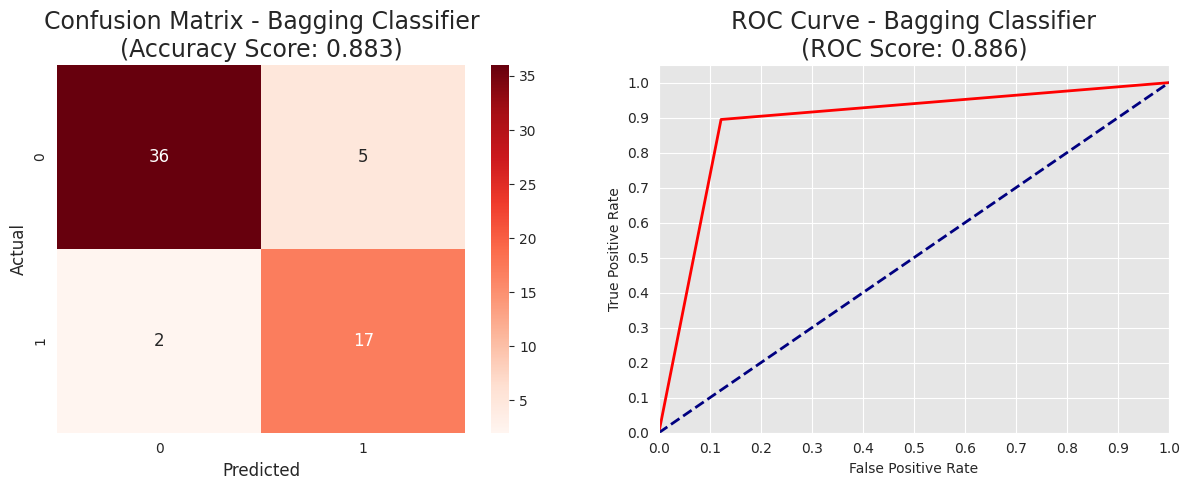

In [119]:
model_name = "Bagging Classifier"
plot_evaluation(y_test, y_pred_BM, fpr_BM, tpr_BM, model_name, cmap='Reds', color='red')

Berdasarkan hasil evaluasi menggunakan metode Bagging Classifier, diperoleh nilai akurasi sebesar 0.8833 dan nilai ROC AUC sebesar 0.8864.

## 2. Boosting Models
* Gradient Boosting: Model ini secara iteratif mempelajari kesalahan prediksi dari model sebelumnya dan mencoba memperbaikinya dengan membangun model berikutnya.
* AdaBoost (Adaptive Boosting): Model ini membangun sekuensial beberapa model lemah (weak learner) seperti pohon keputusan dangkal. Setiap model diberi bobot berdasarkan kinerjanya dan prediksi akhir dihasilkan dengan menggabungkan prediksi dari semua model dengan bobot mereka.

### **2.1 Gradient Boosting**
Model ini secara iteratif mempelajari kesalahan prediksi dari model sebelumnya dan mencoba memperbaikinya dengan membangun model berikutnya.

In [138]:
GBM = GradientBoostingClassifier(learning_rate=0.1, random_state=10)
GBM.fit(X_train_transformed, y_train)

GradientBoostingClassifier(random_state=10)

In [139]:
# Predict Model
y_pred_GBM = GBM.predict(X_test_transformed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_GBM)
print("Accuracy Score:", accuracy)

fpr_GBM, tpr_GBM, thresholds = roc_curve(y_test, y_pred_GBM)
print('ROC AUC Score: {}'.format(auc(fpr_GBM, tpr_GBM)))

Accuracy Score: 0.9
ROC AUC Score: 0.8844672657252888


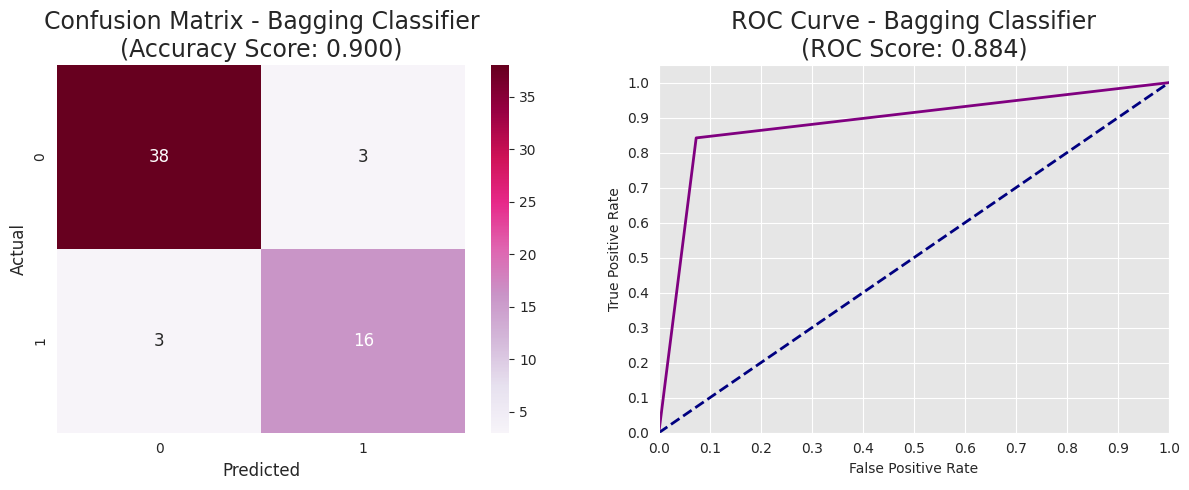

In [170]:
model_name = "Bagging Classifier"
plot_evaluation(y_test, y_pred_GBM, fpr_GBM, tpr_GBM, model_name, cmap='PuRd', color='purple')

Berdasarkan hasil evaluasi model menggunakan Gradient Boosting, diperoleh nilai akurasi sebesar 0.9 dan nilai ROC AUC sebesar 0.8845. 

### **2.2 AdaBoost (Adaptive Boosting)**
Model ini membangun sekuensial beberapa model lemah (weak learner) seperti pohon keputusan dangkal. Setiap model diberi bobot berdasarkan kinerjanya dan prediksi akhir dihasilkan dengan menggabungkan prediksi dari semua model dengan bobot mereka.

In [166]:
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=25)
ada_model.fit(X_train_transformed, y_train)

AdaBoostClassifier(learning_rate=0.1, random_state=25)

In [167]:
# Predict Model
y_pred_ABM = ada_model.predict(X_test_transformed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_ABM)
print("Accuracy Score:", accuracy)

fpr_ABM, tpr_ABM, thresholds = roc_curve(y_test, y_pred_ABM)
print('ROC AUC Score: {}'.format(auc(fpr_ABM, tpr_ABM)))

Accuracy Score: 0.8833333333333333
ROC AUC Score: 0.8581514762516047


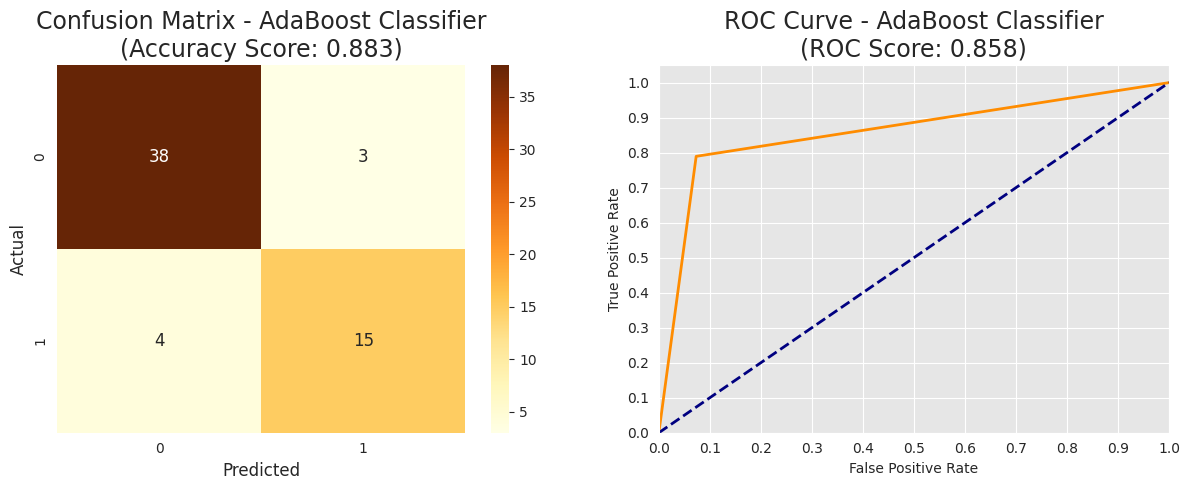

In [169]:
model_name = "AdaBoost Classifier"
plot_evaluation(y_test, y_pred_ABM, fpr_ABM, tpr_ABM, model_name, cmap='YlOrBr', color='darkorange')

Setelah melakukan evaluasi terhadap model menggunakan AdaBoostClassifier, didapatkan hasil akurasi sebesar 0.883 dan nilai ROC AUC sebesar 0.858

## 3. Stacking
Stacking adalah metode ensemble learning yang melibatkan penggabungan beberapa model machine learning (model-level) untuk membuat model meta (meta-model) yang digunakan untuk menghasilkan prediksi akhir.

### **3.1 Stacking Model 1**
Dalam kode stacking model 1 di bawah ini, terdapat tiga estimator yaitu LogisticRegression, DecisionTreeClassifier, dan KNeighborsClassifier. Model-model ini digabungkan menggunakan StackingClassifier dengan menggunakan LogisticRegression sebagai estimator terakhir. Proses pelatihan melibatkan penggunaan masing-masing estimator untuk membuat prediksi pada data pelatihan, kemudian prediksi-prediksi tersebut digunakan sebagai fitur masukan untuk final_estimator.

In [173]:
estimators_1 = [
    ('logistic', LogisticRegression()),
    ('tree', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
]

stacking_model_1 = StackingClassifier(estimators=estimators_1, final_estimator=LogisticRegression())
stacking_model_1.fit(X_train_transformed, y_train)

StackingClassifier(estimators=[('logistic', LogisticRegression()),
                               ('tree', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [174]:
y_pred_S1 = stacking_model_1.predict(X_test_transformed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_S1)
print("Accuracy Score:", accuracy)

fpr_S1, tpr_S1, thresholds = roc_curve(y_test, y_pred_S1)
print('ROC AUC Score: {}'.format(auc(fpr_S1, tpr_S1)))

Accuracy Score: 0.8666666666666667
ROC AUC Score: 0.8177150192554556


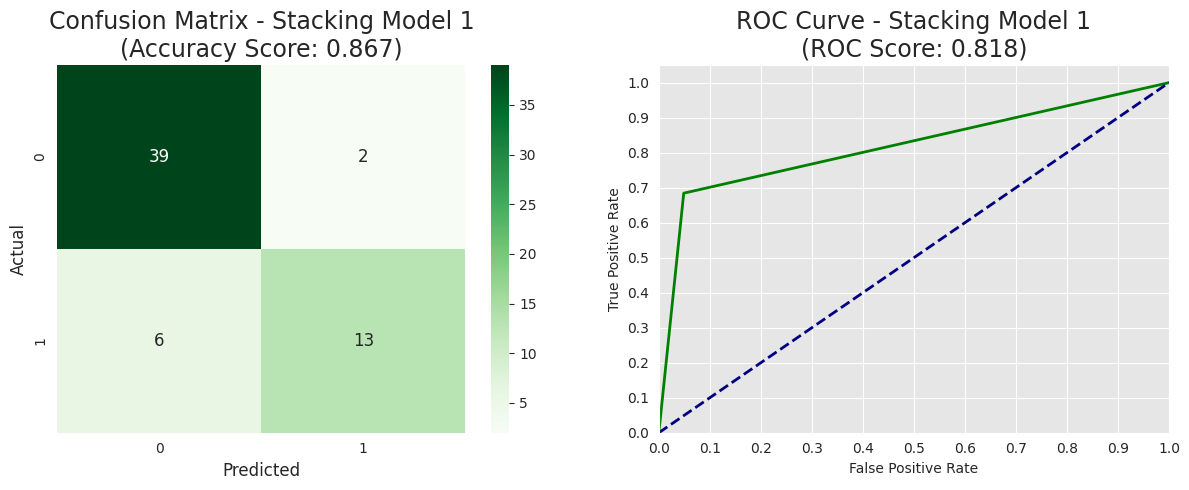

In [196]:
model_name = "Stacking Model 1"
plot_evaluation(y_test, y_pred_S1, fpr_S1, tpr_S1, model_name, cmap='Greens', color='green')

Berdasarkan evaluasi model menggunakan stacking model dengan tiga estimator, yaitu LogisticRegression, DecisionTreeClassifier, dan KNeighborsClassifier, dan final_estimator berupa LogisticRegression, diperoleh nilai akurasi sebesar 0.867 dan nilai ROC AUC sebesar 0.818. 


### **3.2 Stacking Model 2**

Dalam kode stacking model 2 di bawah ini, terdapat dua estimator yaitu RandomForestClassifier dengan 50 pohon keputusan dan SVC dengan StandardScaler sebagai preprocessor. Model-model ini digabungkan menggunakan StackingClassifier dengan menggunakan LogisticRegression sebagai estimator terakhir. Proses pelatihan melibatkan penggunaan masing-masing estimator untuk membuat prediksi pada data pelatihan, kemudian prediksi-prediksi tersebut digunakan sebagai fitur masukan untuk final_estimator.

In [191]:
estimators_2 =  [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=24)),
    ('svc', make_pipeline(StandardScaler(), SVC(random_state=24)))
]

final_estimator = LogisticRegression(random_state=24)
stacking_model_2 = StackingClassifier(estimators=estimators_2, final_estimator=final_estimator)
stacking_model_2.fit(X_train_transformed, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=24)),
                               ('svc',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(random_state=24))]))],
                   final_estimator=LogisticRegression(random_state=24))

In [192]:
y_pred_S2 = stacking_model_2.predict(X_test_transformed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_S2)
print("Accuracy Score:", accuracy)

fpr_S2, tpr_S2, thresholds = roc_curve(y_test, y_pred_S2)
print('ROC AUC Score: {}'.format(auc(fpr_S2, tpr_S2)))

Accuracy Score: 0.8666666666666667
ROC AUC Score: 0.8318356867779204


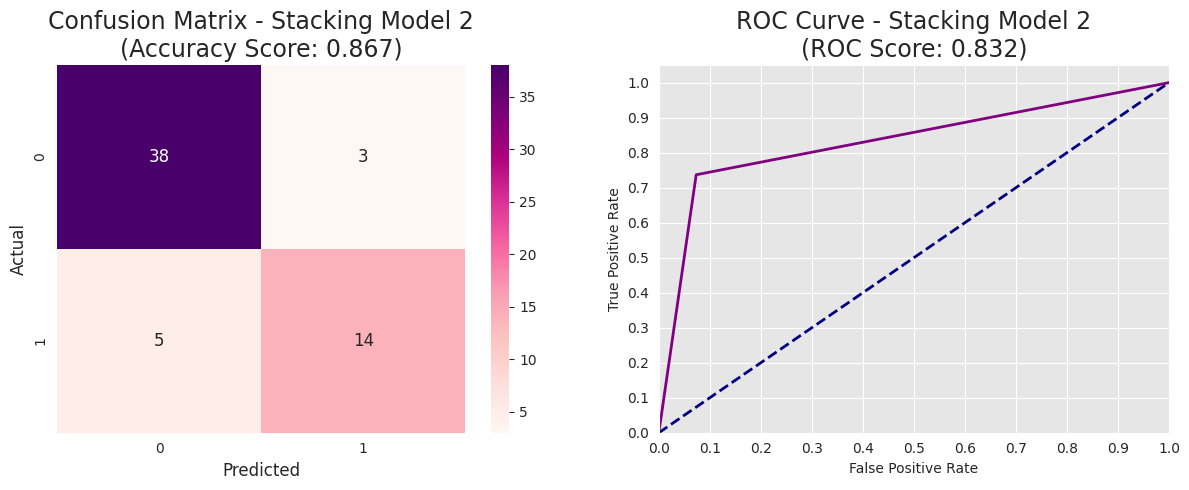

In [210]:
model_name = "Stacking Model 2"
plot_evaluation(y_test, y_pred_S2, fpr_S2, tpr_S2, model_name, cmap='RdPu', color='purple')

Berdasarkan evaluasi model menggunakan kode stacking model 2, diperoleh nilai akurasi sebesar 0.867 dan nilai ROC AUC sebesar 0.832.

### **3.3 Stacking Model 3**

Pada kode di bawah ini digunakan tiga estimator, yaitu RandomForestClassifier dan KNeighborsClassifier, yang digabungkan menggunakan StackingClassifier. Estimator-estimator tersebut digunakan untuk membuat prediksi pada data pelatihan, dan prediksi-prediksi tersebut kemudian digunakan sebagai fitur masukan untuk final_estimator, yang dalam kasus ini adalah MLPClassifier.

In [189]:
estimators_3 =  [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier())
]
final_estimator = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
stacking_model_3 = StackingClassifier(estimators=estimators_3, final_estimator=final_estimator)
stacking_model_3.fit(X_train_transformed, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=MLPClassifier(hidden_layer_sizes=(100, 100),
                                                 max_iter=1000,
                                                 random_state=42))

In [190]:
y_pred_S3 = stacking_model_3.predict(X_test_transformed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_S3)
print("Accuracy Score:", accuracy)

fpr_S3, tpr_S3, thresholds = roc_curve(y_test, y_pred_S3)
print('ROC AUC Score: {}'.format(auc(fpr_S3, tpr_S3)))

Accuracy Score: 0.8666666666666667
ROC AUC Score: 0.8600770218228497


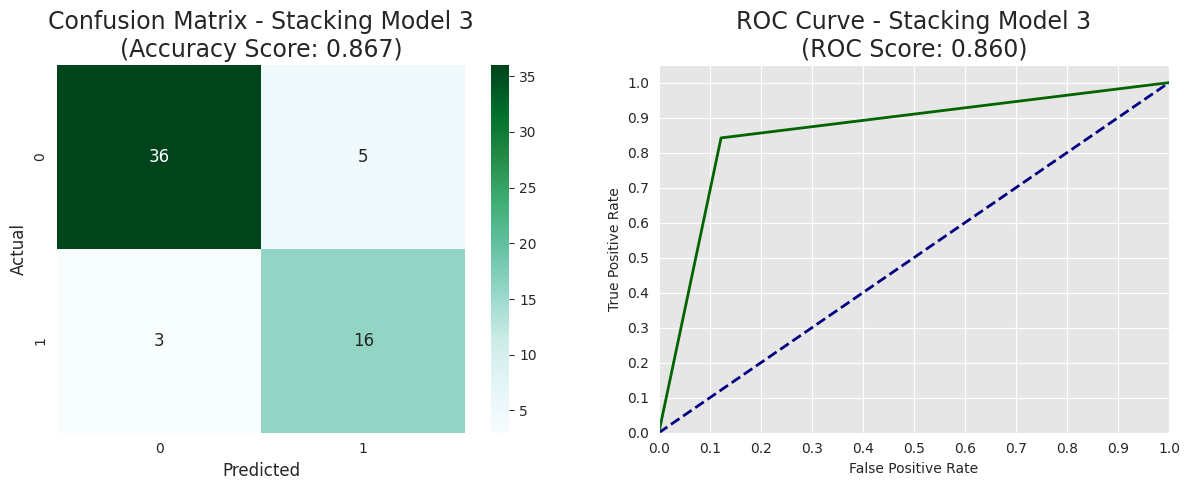

In [206]:
model_name = "Stacking Model 3"
plot_evaluation(y_test, y_pred_S3, fpr_S3, tpr_S3, model_name, cmap='BuGn', color='darkgreen')

Dari hasil evaluasi model menggunakan kode di atas, diperoleh nilai akurasi sebesar 0.867 dan nilai ROC AUC sebesar 0.860. Hal ini menunjukkan bahwa model stacking dengan penggunaan estimator RandomForestClassifier, KNeighborsClassifier, dan final_estimator MLPClassifier memiliki performa yang baik dalam mengklasifikasikan data. Model ini berhasil mencapai tingkat akurasi yang relatif tinggi dan memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif.

# Kesimpulan